In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.stats import norm, expon
from sklearn.model_selection import train_test_split

# T2

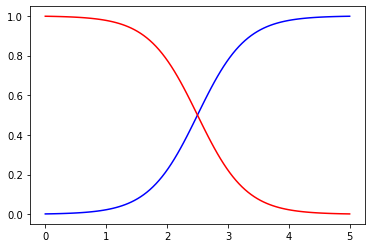

In [2]:
x = np.linspace(0, 5, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(2))
plt.plot(x, (XW1/(XW1+XW2)), c = "blue")
plt.plot(x, (XW2/(XW1+XW2)), c = "red")

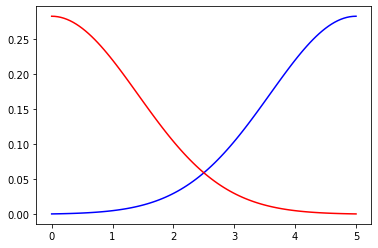

In [3]:
plt.plot(x, XW1, c = "blue")
plt.plot(x, XW2, c = "red")

# T3

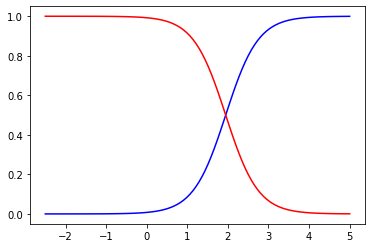

In [4]:
x = np.linspace(-2.5, 5, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(2))
plt.plot(x, (4*XW1/(4*XW1+XW2)), c = "blue")
plt.plot(x, (XW2/(4*XW1+XW2)), c = "red")

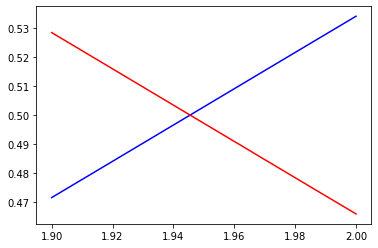

In [5]:
x = np.linspace(1.9, 2, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(2))
plt.plot(x, (4*XW1/(4*XW1+XW2)), c = "blue")
plt.plot(x, (XW2/(4*XW1+XW2)), c = "red")

# OT2


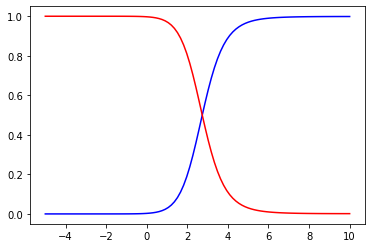

In [6]:
x = np.linspace(-5, 10, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))+1e-15
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(4))+1e-15
plt.plot(x, (XW1/(XW1+XW2)), c = "blue")
plt.plot(x, (XW2/(XW1+XW2)), c = "red")

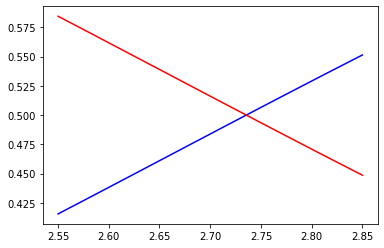

In [7]:
x = np.linspace(2.55, 2.85, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(4))
plt.plot(x, (XW1/(XW1+XW2)), c = "blue")
plt.plot(x, (XW2/(XW1+XW2)), c = "red")

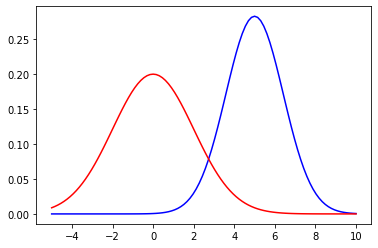

In [8]:
x = np.linspace(-5, 10, 100)
XW1 = norm.pdf(x, loc = 5, scale = math.sqrt(2))+1e-15
XW2 = norm.pdf(x, loc = 0, scale = math.sqrt(4))+1e-15
plt.plot(x, XW1, c = "blue")
plt.plot(x, XW2, c = "red")

#Data manipulation 


In [9]:
data_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(data_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
dtypes = data.dtypes
for i,j in dtypes.items():
  print(i,j)

Age int64
Attrition object
BusinessTravel object
DailyRate int64
Department object
DistanceFromHome int64
Education int64
EducationField object
EmployeeCount int64
EmployeeNumber int64
EnvironmentSatisfaction int64
Gender object
HourlyRate int64
JobInvolvement int64
JobLevel int64
JobRole object
JobSatisfaction int64
MaritalStatus object
MonthlyIncome int64
MonthlyRate int64
NumCompaniesWorked int64
Over18 object
OverTime object
PercentSalaryHike int64
PerformanceRating int64
RelationshipSatisfaction int64
StandardHours int64
StockOptionLevel int64
TotalWorkingYears int64
TrainingTimesLastYear int64
WorkLifeBalance int64
YearsAtCompany int64
YearsInCurrentRole int64
YearsSinceLastPromotion int64
YearsWithCurrManager int64


In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
data.loc[data['Attrition'] == 'No', 'Attrition'] = 0
data.loc[data['Attrition'] == 'Yes', 'Attrition'] = 1

cat_cols = list()

for i,j in dtypes.items():
  if j == "object":
    cat_cols.append(i)

for col in cat_cols:
  data[col] = pd.Categorical(data[col]).codes

In [14]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
data = data.drop(columns = "EmployeeNumber")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
feature = list(data.columns)
feature.remove('Attrition')
print(len(feature), feature)

33 ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [17]:
X = data[feature]
y = data[['Attrition']]

In [18]:
def train_test_split(X, y, ratio = 0.9):
  index = np.arange(len(X))
  index_train = np.random.choice(index, size = int(0.9*len(X)), replace = False)
  index_test = np.setdiff1d(index, index_train)
  X_train = X.iloc[index_train]
  X_test = X.iloc[index_test]
  y_train = y.iloc[index_train] 
  y_test = y.iloc[index_test]
  return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#T4

In [20]:
col = ['Age', 'MonthlyIncome', 'DistanceFromHome']

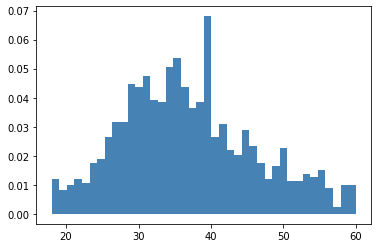

In [21]:
train_col_no_nan = X_train[~np.isnan(X_train[feature])]['Age']
hist, bin_edge = np.histogram(train_col_no_nan, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()

In [22]:
(hist==0).sum()

0

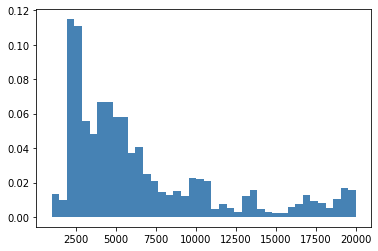

In [23]:
train_col_no_nan = X_train[~np.isnan(X_train[feature])]['MonthlyIncome']
hist, bin_edge = np.histogram(train_col_no_nan, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()

In [24]:
(hist==0).sum()

0

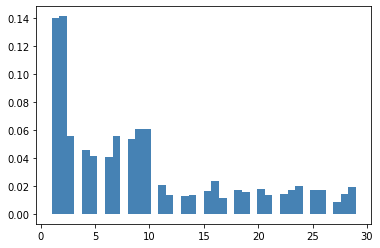

In [25]:
train_col_no_nan = X_train[~np.isnan(X_train[feature])]['DistanceFromHome']
hist, bin_edge = np.histogram(train_col_no_nan, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()

In [26]:
(hist==0).sum()

11

#T5

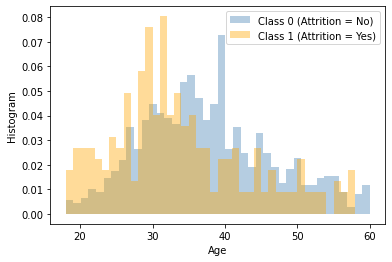

In [27]:
class1 = X_train.loc[y_train['Attrition'] == 0]['Age']
class2 = X_train.loc[y_train['Attrition'] == 1]['Age']

hist, bin_edge = np.histogram(class1, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

hist, bin_edge = np.histogram(class2, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='orange', alpha = 0.4, label = "Class 1 (Attrition = Yes)")
plt.legend()

plt.xlabel('Age')
plt.ylabel('Histogram')
plt.show()

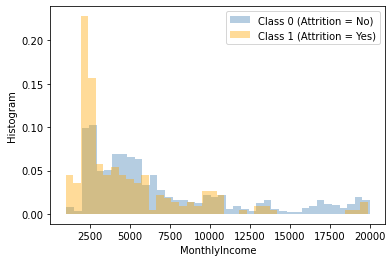

In [28]:
class1 = X_train.loc[y_train['Attrition'] == 0]['MonthlyIncome']
class2 = X_train.loc[y_train['Attrition'] == 1]['MonthlyIncome']

hist, bin_edge = np.histogram(class1, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

hist, bin_edge = np.histogram(class2, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='orange', alpha = 0.4, label = "Class 1 (Attrition = Yes)")
plt.legend()

plt.xlabel('MonthlyIncome')
plt.ylabel('Histogram')
plt.show()

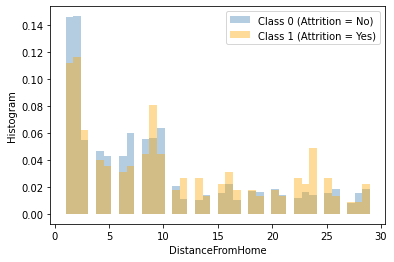

In [29]:
class1 = X_train.loc[y_train['Attrition'] == 0]['DistanceFromHome']
class2 = X_train.loc[y_train['Attrition'] == 1]['DistanceFromHome']

hist, bin_edge = np.histogram(class1, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

hist, bin_edge = np.histogram(class2, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='orange', alpha = 0.4, label = "Class 1 (Attrition = Yes)")
plt.legend()

plt.xlabel('DistanceFromHome')
plt.ylabel('Histogram')
plt.show()

#T6


In [30]:
def plot_histogram(X, bins):
  min = X.min()
  max = X.max()

  bins = np.linspace(min, max, num=bins+1)
  indc = np.digitize(X, bins, right = True)
  hist = np.bincount(indc)

  return hist[1:], bins

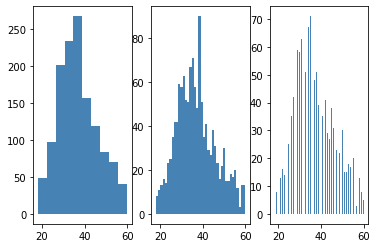

In [31]:
hist1, bin_edge1 = plot_histogram(X_train['Age'], 10)
hist2, bin_edge2 = plot_histogram(X_train['Age'], 40)
hist3, bin_edge3 = plot_histogram(X_train['Age'], 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.fill_between(bin_edge1.repeat(2)[1:-1], hist1.repeat(2), facecolor='steelblue')
ax2.fill_between(bin_edge2.repeat(2)[1:-1], hist2.repeat(2), facecolor='steelblue')
ax3.fill_between(bin_edge3.repeat(2)[1:-1], hist3.repeat(2), facecolor='steelblue')

plt.show()

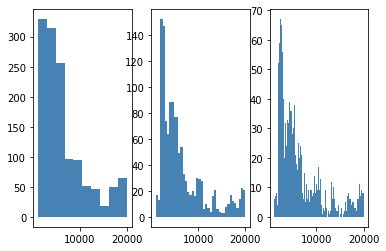

In [32]:
hist1, bin_edge1 = plot_histogram(X_train['MonthlyIncome'], 10)
hist2, bin_edge2 = plot_histogram(X_train['MonthlyIncome'], 40)
hist3, bin_edge3 = plot_histogram(X_train['MonthlyIncome'], 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.fill_between(bin_edge1.repeat(2)[1:-1], hist1.repeat(2), facecolor='steelblue')
ax2.fill_between(bin_edge2.repeat(2)[1:-1], hist2.repeat(2), facecolor='steelblue')
ax3.fill_between(bin_edge3.repeat(2)[1:-1], hist3.repeat(2), facecolor='steelblue')

plt.show()

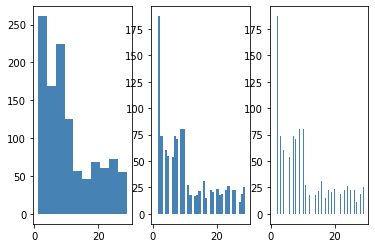

In [33]:
hist1, bin_edge1 = plot_histogram(X_train['DistanceFromHome'], 10)
hist2, bin_edge2 = plot_histogram(X_train['DistanceFromHome'], 40)
hist3, bin_edge3 = plot_histogram(X_train['DistanceFromHome'], 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.fill_between(bin_edge1.repeat(2)[1:-1], hist1.repeat(2), facecolor='steelblue')
ax2.fill_between(bin_edge2.repeat(2)[1:-1], hist2.repeat(2), facecolor='steelblue')
ax3.fill_between(bin_edge3.repeat(2)[1:-1], hist3.repeat(2), facecolor='steelblue')

plt.show()

#T7

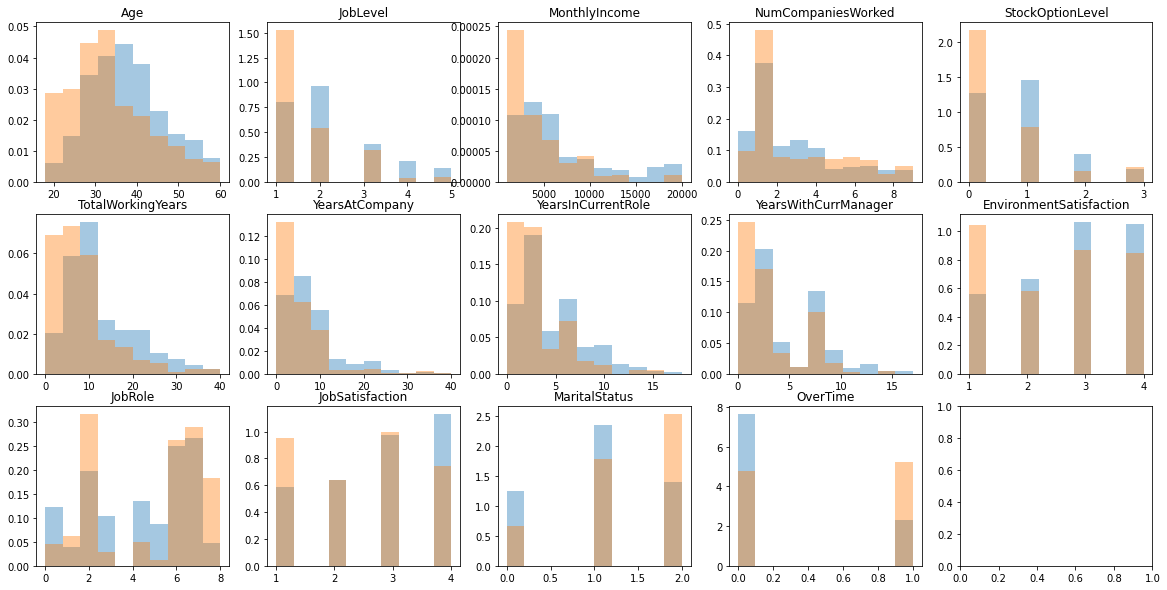

In [34]:
fig, ax = plt.subplots(3, 5)

bins = 10
num_feature = ['Age', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 
               'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
cat_feature = ['EnvironmentSatisfaction', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
features = num_feature+cat_feature

for i in range(len(features)):
  class0 = X_train.loc[y_train['Attrition'] == 0][features[i]]
  class1 = X_train.loc[y_train['Attrition'] == 1][features[i]]
  min = X_train[features[i]].min()
  max = X_train[features[i]].max()

  ax[int(i/5),i%5].hist(class0, bins = bins, range = (min, max), density = True, alpha = 0.4)
  ax[int(i/5),i%5].hist(class1, bins = bins, range = (min, max), density = True, alpha = 0.4)
  ax[int(i/5),i%5].set_title(features[i])

fig.set_size_inches(20, 10)


#T8


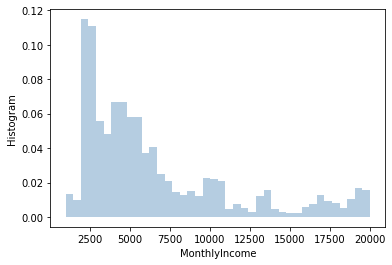

In [35]:
data = X_train['MonthlyIncome']

hist, bin_edge = np.histogram(data, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

plt.xlabel('MonthlyIncome')
plt.ylabel('Histogram')
plt.show()

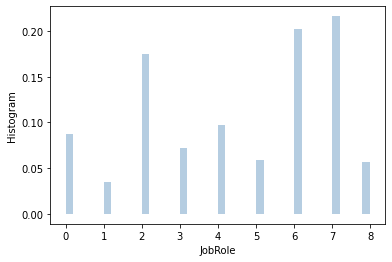

In [36]:
data = X_train['JobRole']

hist, bin_edge = np.histogram(data, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

plt.xlabel('JobRole')
plt.ylabel('Histogram')
plt.show()

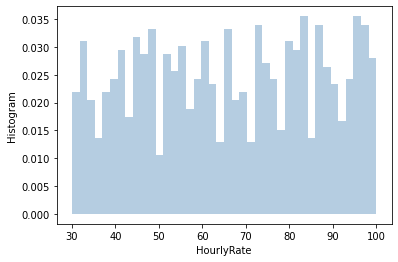

In [37]:
data = X_train['HourlyRate']

hist, bin_edge = np.histogram(data, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

plt.xlabel('HourlyRate')
plt.ylabel('Histogram')
plt.show()

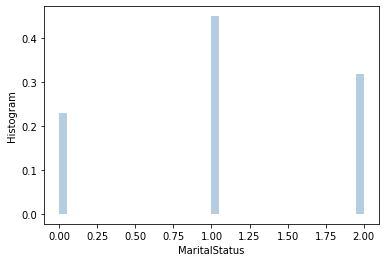

In [38]:
data = X_train['MaritalStatus']

hist, bin_edge = np.histogram(data, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

plt.xlabel('MaritalStatus')
plt.ylabel('Histogram')
plt.show()

#T9

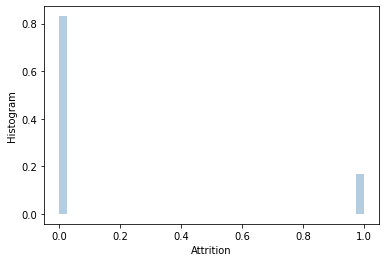

In [39]:
data = y_train['Attrition']

hist, bin_edge = np.histogram(data, 40)
hist = hist/hist.sum()
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4, label = "Class 0 (Attrition = No)")

plt.xlabel('Attrition')
plt.ylabel('Histogram')
plt.show()

#T11


In [40]:
X_train.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.869237,1.602419,800.195011,1.255480,9.268330,2.899471,2.251701,1.0,2.724112,0.600151,65.896447,2.731670,2.073318,4.461073,2.740741,1.089947,6554.584278,14281.065760,2.678005,0.0,0.281935,15.173847,3.150416,2.703704,80.0,0.797430,11.284958,2.799698,2.764172,6.995465,4.173091,2.167045,4.099017
std,9.192527,0.668546,404.381654,0.524475,8.118531,1.022304,1.331335,0.0,1.092645,0.490052,20.451648,0.717062,1.121880,2.448987,1.105643,0.736090,4781.867893,7131.414249,2.493385,0.0,0.450112,3.628557,0.357614,1.085544,0.0,0.854689,7.806160,1.284117,0.710001,6.169319,3.573241,3.200804,3.577966
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,461.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2909.000000,7974.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,801.000000,1.000000,7.000000,3.000000,2.000000,1.0,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4908.000000,14199.000000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1155.500000,2.000000,14.000000,4.000000,3.000000,1.0,4.000000,1.000000,84.000000,3.000000,3.000000,7.000000,4.000000,2.000000,8402.000000,20442.000000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
len(X_train.columns)

33

In [42]:
y_train.head()

,Attrition
809,0
369,0
1055,0
847,0
686,0


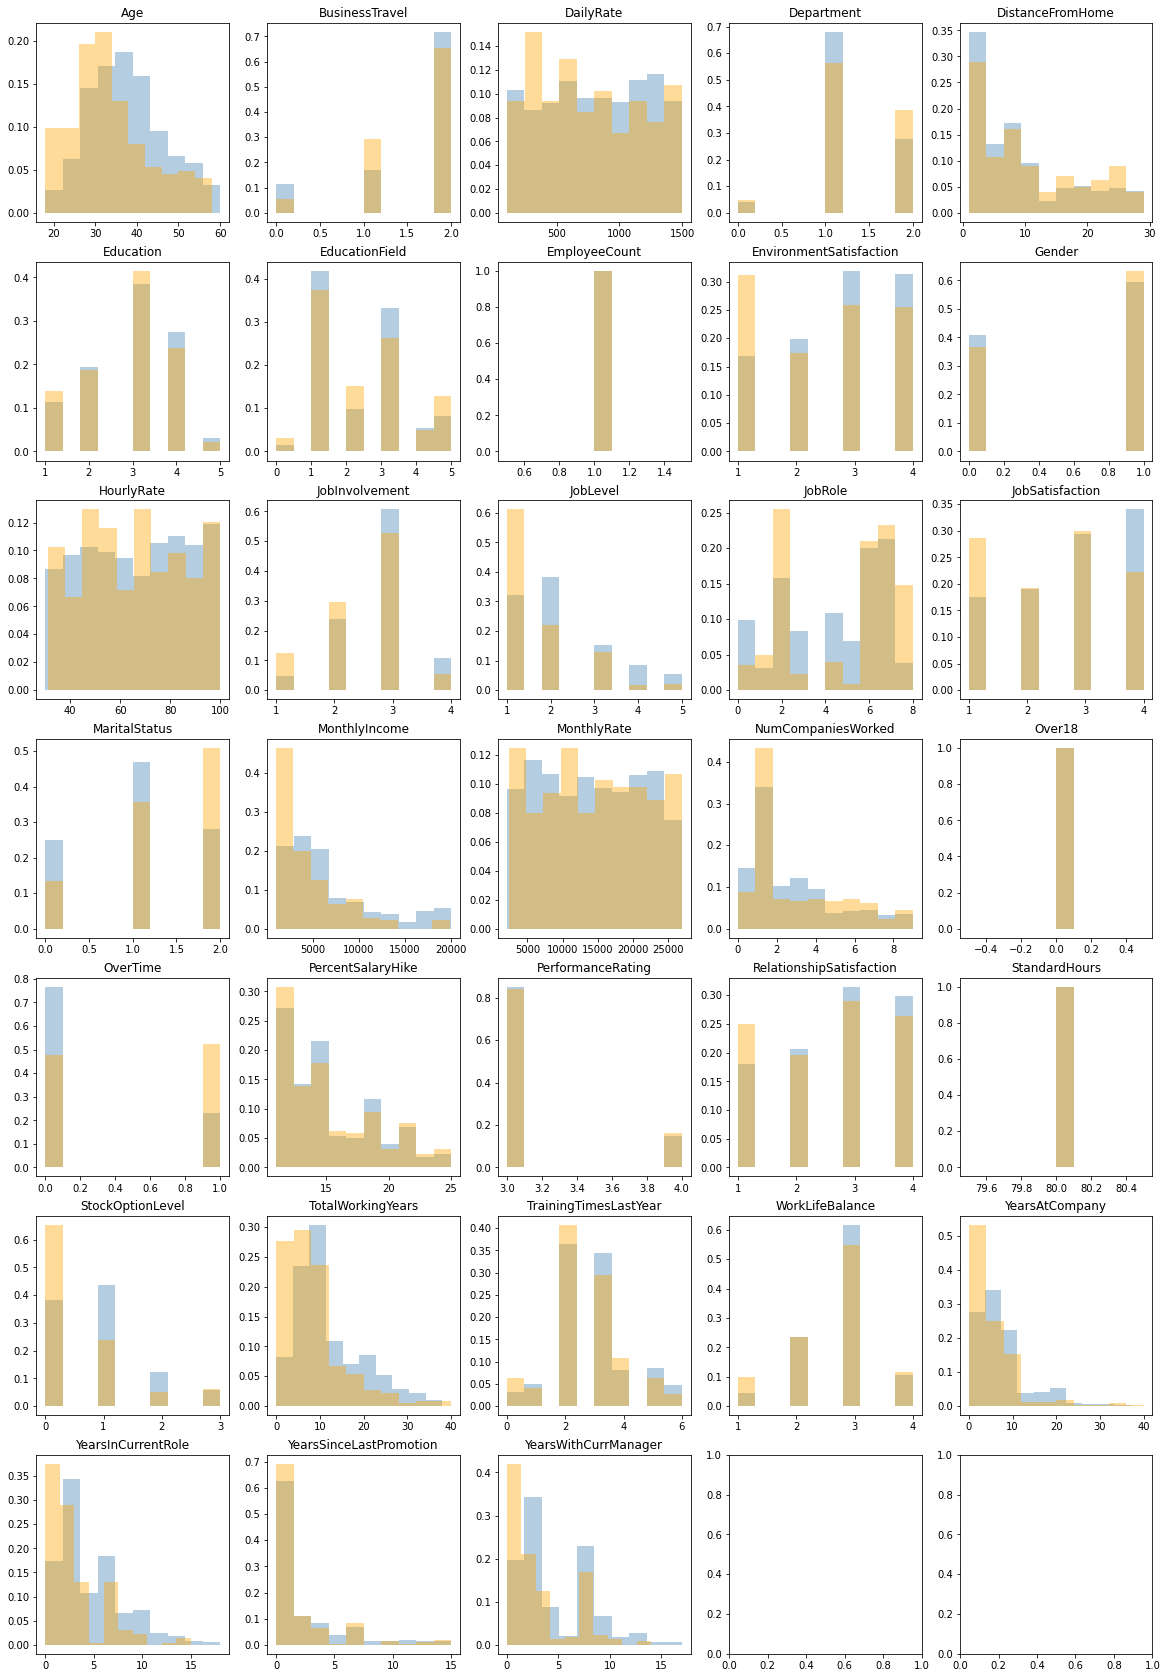

In [43]:
fig, ax = plt.subplots(7, 5)

bins = 10

for i in range(len(X_train.columns)):
  class0 = X_train.loc[y_train['Attrition'] == 0][X_train.columns[i]]
  class1 = X_train.loc[y_train['Attrition'] == 1][X_train.columns[i]]

  hist, bin_edge = np.histogram(class0, bins)
  hist = hist/hist.sum()
  ax[int(i/5),i%5].fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue', alpha = 0.4)

  hist, bin_edge = np.histogram(class1, bins)
  hist = hist/hist.sum()
  ax[int(i/5),i%5].fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='orange', alpha = 0.4)

  ax[int(i/5),i%5].set_title(X_train.columns[i])

fig.set_size_inches(20, 30)


In [44]:
class Naive_bayes_hist_classifier:
  def __init__(self, bins):
    self.logPStay = 0
    self.logPLeave = 0
    self.feature = {}
    self.bins = bins
    self.columns = []

  def fit(self, X, y):

    self.logPStay = np.log((y['Attrition'] == 0).sum()/y['Attrition'].count())
    self.logPLeave = np.log((y['Attrition'] == 1).sum()/y['Attrition'].count())
    self.columns = X.columns
    for column in X.columns:
      class0 = X.loc[y['Attrition'] == 0][column]
      class1 =X.loc[y['Attrition'] == 1][column]
      self.feature[column] = {}
      self.feature[column][0] = {}
      self.feature[column][1] = {}

      min, max = class0.min(), class0.max()
      bins = np.linspace(min, max, num=self.bins+1)
      indc = np.digitize(class0, bins, right = True)
      hist = np.bincount(indc)
      prob = hist/hist.sum()

      self.feature[column][0]['bins'] = bins
      self.feature[column][0]['prob'] = prob

      min, max = class1.min(), class1.max()
      bins = np.linspace(min, max, num=self.bins+1)
      indc = np.digitize(class1, bins, right = True)
      hist = np.bincount(indc)
      prob = hist/hist.sum()
      self.feature[column][1]['bins'] = bins
      self.feature[column][1]['prob'] = prob


  def predict_log(self,X):

    def log_mapping(probs, x):
      f = lambda y: probs[y] if(0<y<len(probs) and probs[y]!= 0) else 1e-20
      vf = np.vectorize(f)
      return np.log(vf(x))

    logH = np.zeros(len(X))
    logH = self.logPLeave-self.logPStay
    for column in self.columns:
      class0_bins = self.feature[column][0]['bins']
      class0_prob = self.feature[column][0]['prob']
      temp = np.digitize(X[column], class0_bins, right = True)
      logH -= log_mapping(class0_prob, temp)

      class1_bins = self.feature[column][1]['bins']
      class1_prob = self.feature[column][1]['prob']
      temp = np.digitize(X[column], class1_bins, right = True)
      logH += log_mapping(class1_prob, temp)

    return logH

  def predict(self, X, threashold = 0):
    logH = self.predict_log(X)
    return (logH > threashold).astype(int)

In [45]:
class Meric:
  def compute(X, y, model, threashold = 0, verbal = False):
    y = y['Attrition'] 
    y_pred = model.predict(X, threashold).reshape(y.shape)
    output = {}

    TP = np.logical_and(y == 1, y_pred == 1).sum()
    FP = np.logical_and(y == 0, y_pred == 1).sum()
    FN = np.logical_and(y == 1, y_pred == 0).sum()
    TN = np.logical_and(y == 0, y_pred == 0).sum()

    output['primative'] = [TP, FP, TN, FN]
    output['accuracy'] = (y_pred==y).sum()/(y.count())
    output['precission'] = TP/(TP+FP)
    output['recall'] = TP/(TP+FN)
    output['f1'] = 2*(output['precission']*output['recall'])/(output['precission']+output['recall'])
    
    if verbal :
      for i in ['primative', 'accuracy', 'precission', 'recall', 'f1']:
        print(i, output[i])
    else :
      return output


In [46]:
feature = num_feature+cat_feature
model = Naive_bayes_hist_classifier(40)
model.fit(X_train[feature], y_train)

In [47]:
Meric.compute(X_test[feature], y_test, model, verbal = True)

primative [3, 13, 121, 10]
accuracy 0.8435374149659864
precission 0.1875
recall 0.23076923076923078
f1 0.20689655172413793


In [48]:
Meric.compute(X_test[feature], y_test, model, threashold= 0, verbal = True)

primative [3, 13, 121, 10]
accuracy 0.8435374149659864
precission 0.1875
recall 0.23076923076923078
f1 0.20689655172413793


#T12

In [49]:
class Naive_bayes_normal_classifier:
  def __init__(self):
    self.logPStay = 0
    self.logPLeave = 0
    self.feature = {}
    self.columns = []

  def fit(self, X, y):

    self.logPStay = np.log((y['Attrition'] == 0).sum()/y['Attrition'].count())
    self.logPLeave = np.log((y['Attrition'] == 1).sum()/y['Attrition'].count())
    self.columns = X.columns
    for column in X.columns:
      class0 = X.loc[y['Attrition'] == 0][column]
      class1 = X.loc[y['Attrition'] == 1][column]

      self.feature[column] = {}
      self.feature[column][0] = {}
      self.feature[column][1] = {}

      self.feature[column][0]['mean'] = class0.mean()
      self.feature[column][0]['std'] = class0.std()

      self.feature[column][1]['mean'] = class1.mean()
      self.feature[column][1]['std'] = class1.mean()


  def predict_log(self,X):

    logH = np.zeros(len(X))
    logH = self.logPLeave-self.logPStay
    for column in self.columns:
      class0_mean = self.feature[column][0]['mean']
      class0_std = self.feature[column][0]['std']
      logH -= np.log(norm.pdf(X[column], loc = class0_mean, scale = class0_std))

      class1_mean = self.feature[column][1]['mean']
      class1_std = self.feature[column][1]['std']
      logH += np.log(norm.pdf(X[column], loc = class1_mean, scale = class1_std))

    return logH

  def predict(self, X, threashold = 0):
    logH = self.predict_log(X)
    return (logH > threashold).astype(int)

In [50]:
feature = num_feature+cat_feature
model = Naive_bayes_normal_classifier()
model.fit(X_train[feature], y_train)

In [51]:
Meric.compute(X_test[feature], y_test, model, verbal = True)

primative [0, 3, 131, 13]
accuracy 0.891156462585034
precission 0.0
recall 0.0
f1 nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


#T13


In [52]:
class Random_guess_classfier:
  def predict(self,X, threashold = 0):
    return np.random.choice(2, X.shape[0])

In [53]:
model = Random_guess_classfier()
model.predict(X_train[feature])

array([1, 1, 1, ..., 1, 0, 0])

In [54]:
Meric.compute(X_test[feature], y_test, model, verbal=True)

primative [6, 72, 62, 7]
accuracy 0.46258503401360546
precission 0.07692307692307693
recall 0.46153846153846156
f1 0.13186813186813184


#T14

In [55]:
class Majority_class_classfier:
  def predict(self,X, threashold = 0):
    return np.ones(X.shape[0])*0

In [56]:
model = Majority_class_classfier()

In [57]:
Meric.compute(X_test[feature], y_test, model, verbal=True)

primative [0, 0, 134, 13]
accuracy 0.9115646258503401
precission nan
recall 0.0
f1 nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


#T16


In [58]:
t = np.arange(-5,5,0.05)

In [59]:
feature = num_feature+cat_feature
model = Naive_bayes_hist_classifier(40)
model.fit(X_train[feature], y_train)

In [60]:
max_acc = 0
pos_acc = -1
max_F1 = 0
pos_F1 = -1

for i in t:
  output = Meric.compute(X_test[feature], y_test, model, verbal=False, threashold=i)
  if output['accuracy'] > max_acc :
    max_acc = output['accuracy']
    pos_acc = i
  if output['f1'] > max_F1 :
    max_F1 = output['f1']
    pos_F1 = i

max_acc, pos_acc, max_F1, pos_F1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


(0.9047619047619048,
 4.899999999999965,
 0.23529411764705882,
 -0.7500000000000151)

In [61]:
Meric.compute(X_test[feature], y_test, model, verbal=True, threashold=1.4999999999942304)

primative [1, 6, 128, 12]
accuracy 0.8775510204081632
precission 0.14285714285714285
recall 0.07692307692307693
f1 0.1


In [62]:
Meric.compute(X_test[feature], y_test, model, verbal=True, threashold=-0.9000000000056332)

primative [4, 18, 116, 9]
accuracy 0.8163265306122449
precission 0.18181818181818182
recall 0.3076923076923077
f1 0.2285714285714286


#T17



In [63]:
t = np.arange(-100,100,0.1)

In [ ]:
tfr1 = []
fpr1 = []

for i in t:
  output = Meric.compute(X_test[feature], y_test, model, verbal=False, threashold=i)
  TP, FP, TN, FN = output['primative']
  tfr1.append(TP/(TP+FN))
  fpr1.append(FP/(FP+TN))

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(fpr1, tfr1)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#T18


In [ ]:
feature = num_feature+cat_feature
model = Naive_bayes_hist_classifier(5)
model.fit(X_train[feature], y_train)

In [ ]:
tfr2 = []
fpr2 = []

for i in t:
  output = Meric.compute(X_test[feature], y_test, model, verbal=False, threashold=i)
  TP, FP, TN, FN = output['primative']
  tfr2.append(TP/(TP+FN))
  fpr2.append(FP/(FP+TN))

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(fpr1, tfr1, label = 'Bins = 40')
plt.plot(fpr2, tfr2, label = 'Bins = 5')
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#OT3

In [ ]:
accuracies = [] 

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = Naive_bayes_hist_classifier(40)
  model.fit(X_train[feature], y_train)
  output = Meric.compute(X_test[feature], y_test, model, verbal=False, threashold=-2.45)
  accuracies.append(output['accuracy'])

accuracies = np.array(accuracies)
accuracies.mean(), accuracies.std()**2, accuracies